# Geometry of Linear Equations (18.06_L1)
> Linear Algebra - An introduction to Systems of Linear Equations

- toc: true 
- badges: true
- comments: true
- author: Isaac Flath
- categories: [Linear Algebra]

In [1]:
#collapse-hide
import matplotlib.pyplot as plt
from torch import tensor
from torch import solve
import numpy as np
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

# Motivation

One of my goals is to understand more deeply what Neural Networks are doing.  Another is to have an easier time understanding and implementing cutting edge academic papers.  In order to work toward those goals, I am revisiting the Math behind Neural Networks.  This time my goal is to understand intuitively every piece of the material forward and backward - rather than to pass a course on a deadline.

This blog post will be my notes about Lecture 1 from the following course:

Gilbert Strang. 18.06 Linear Algebra. Spring 2010. Massachusetts Institute of Technology: MIT OpenCourseWare, https://ocw.mit.edu. License: Creative Commons BY-NC-SA.

# Goal

The goal is to solve N equations with N unknowns.  We will start with 2 equations with 2 unknowns, then go to 3 equations with 3 unknowns.  We will use an intuitive approach here to understand a bit about how linear equations work.

How do we multiply these together?

# Matrix Multiplication (Ax=b)

$\begin{bmatrix}
2 & 5 \\
1 & 3 
\end{bmatrix}$
$\begin{bmatrix}
1 \\ 2
\end{bmatrix}$
$=1$
$\begin{bmatrix}
2 \\ 1
\end{bmatrix}$
$+2$
$\begin{bmatrix}
5 \\ 3
\end{bmatrix}$
$=$
$\begin{bmatrix}
12\\7
\end{bmatrix}$

Ax is a linear combination of columns

# 2 equations 2 unknowns

Ok, Let's look at a couple equations in a few different ways.  The solution to these are any values of x and y that make both equations true.

$2x - y = 0$

$-x + 2y = 3$


### Row Picture

We can take these 2 linear equations and plot them.

$2x - y = 0$ could be writen as $y = 2x$, which is trivial to graph.  If we graph them both, we can see visually where they are both true (the intersection).

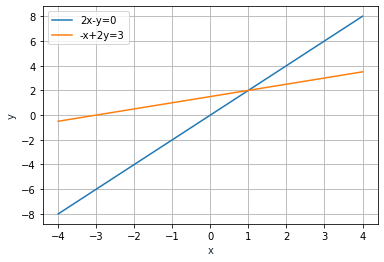

In [2]:
def plot_equations_2d(x_range,y_dict):
    for y in y_dict:
        plt.plot(x, y_dict[y], label=y)
    plt.xlabel('x', color='#1C2833')
    plt.ylabel('y', color='#1C2833')
    plt.legend(loc='upper left')
    plt.grid()
    plt.show()  
    
x = tensor(np.linspace(-4,4,100))
y_dict = {'2x-y=0':2*x,
         '-x+2y=3':(3 + x)/2}
plot_equations_2d(x,y_dict)        

### Column Picture

We can rewrite out equations into a different notation, which gives us a more concise view of what is going on.  You can see that the top row is the first equation, and the bottom row is the second.  Same thing, written differently.

$x$
$\begin{bmatrix}
2 \\ 
-1
\end{bmatrix}$
$+y$
$\begin{bmatrix}
-1 \\
2
\end{bmatrix}$
$=$
$\begin{bmatrix}
0 \\
3
\end{bmatrix}$

### Graphed as Vectors

Now that we see them it in column form, we can graph the vectors

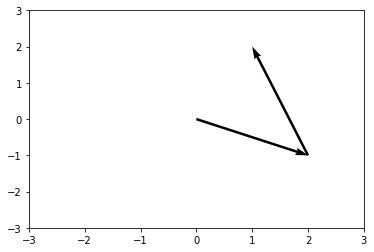

In [3]:
#collapse-hide
strt_pts = tensor([[0,0],[2,-1]])
end_pts = tensor([[2,-1],[1,2]])

diff = end_pts - strt_pts
plt.ylim([-3, 3])
plt.xlim([-3, 3])

plt.quiver(strt_pts[:,0], strt_pts[:,1], diff[:,0], diff[:,1],
           angles='xy', scale_units='xy', scale=1.)

plt.show()

### Summed as Vectors

Now that they are represented as vectors.  Let's add 1X + 2Y vectors and see that we get (0,3).  Simply make one vector start where the other ends

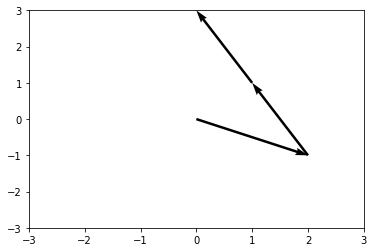

In [4]:
#collapse-hide
strt_pts = tensor([[0,0],[2,-1],[1,1]])
end_pts = tensor([[2,-1],[1,1],[0,3]])

diff = end_pts - strt_pts
plt.ylim([-3, 3])
plt.xlim([-3, 3])

plt.quiver(strt_pts[:,0], strt_pts[:,1], diff[:,0], diff[:,1],
           angles='xy', scale_units='xy', scale=1.)

plt.show()

### Matrix Form AX = b

We can see the same view in matrix notation.  Same as the row and column view, just in a nice compressed format.

$\begin{bmatrix}
2 & -1 \\
-1 & 2
\end{bmatrix}$
$\begin{bmatrix}
x \\ 
y
\end{bmatrix}$
$=$
$\begin{bmatrix}
0 \\
3
\end{bmatrix}$

# Equations, 3 equations 3 unknowns
$2x - y = 0$

$-x + 2y -z = -1$

$-3y + 4z = 4$

### Matrix Form
$A=$
$\begin{bmatrix}
2 & -1 & 0 \\
-1 & 2 & -1 \\
0 & -3 & 4
\end{bmatrix}$
$b=$
$\begin{bmatrix}
0\\-1\\4
\end{bmatrix}$

### Row Picture

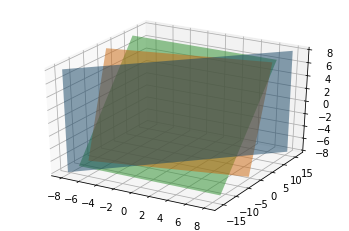

In [5]:
#collapse-hide
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x, z = tensor(np.linspace(-8,8,100)), tensor(np.linspace(-8,8,100))
X, Z = np.meshgrid(x,z)

Y1 = 2*X
Y2 = (-1 + X + Z) / 2
Y3 = (4*Z - 4)/3

ax.plot_surface(X,Y1,Z, alpha=0.5, rstride=100, cstride=100)
ax.plot_surface(X,Y2,Z, alpha=0.5, rstride=100, cstride=100)
ax.plot_surface(X,Y3,Z, alpha=0.5, rstride=100, cstride=100)

plt.show()

### Column Picture

We can create the column picture and graph vectors, just like in 2D space.  Graphing in 3D is harder to see, but it's the same concept.

In this example we can clearly see the solution is x = 0, y = 0, z = 1.

$x$
$\begin{bmatrix}
2 \\ -1 \\ 0 
\end{bmatrix}$
$+y$
$\begin{bmatrix}
-1 \\ 2 \\ -3 
\end{bmatrix}$
$+z$
$\begin{bmatrix}
0 \\ -1 \\ 4
\end{bmatrix}$
$=$
$\begin{bmatrix}
0 \\ -1 \\ 4
\end{bmatrix}$

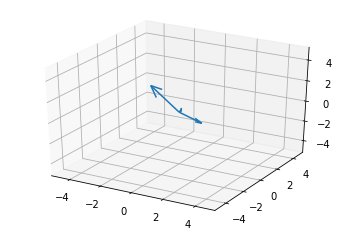

In [6]:
#collapse-hide
strt_pts = tensor([[0,0,0],[0,0,0],[0,0,0]])
end_pts = tensor([[2,-1,0],[-1,2,-1],[0,-3,4]])

diff = end_pts - strt_pts
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_zlim([-5, 5])

plt.quiver(strt_pts[0,0],
           strt_pts[0,1],
           strt_pts[0,2],
           end_pts[0,0],
           end_pts[0,1],
           end_pts[0,2])
plt.quiver(strt_pts[1,0],
           strt_pts[1,1],
           strt_pts[1,2],
           end_pts[1,0],
           end_pts[1,1],
           end_pts[1,2])
plt.quiver(strt_pts[2,0],
           strt_pts[2,1],
           strt_pts[2,2],
           end_pts[2,0],
           end_pts[2,1],
           end_pts[2,2])
plt.show()

# Numpy Solver

Here's how you can solve the equation using Numpy.

In [7]:
a = np.array([[2, -1, 0], [-1, 2, -1], [0, -3, 4]])
b = np.array([0, -1, 4])
x = np.linalg.solve(a, b)
print(x)

[ 0. -0.  1.]


### Can I solve Ax = b for every b?

Do the linear combinations of the columns fill 3 dimensional space.

If you have some dimensionality in each direction, then you can.  3 equations with 3 unknowns can fill the 3D space as long as they don't sit on the same line or plane.

In [8]:
# lets expirament
length_b = 20
b = np.array([list(np.random.rand(length_b)*10),
     list(np.random.rand(length_b)*10),
     list(np.random.rand(length_b)*10)])
for x in range(0,length_b):
    x = np.linalg.solve(a, b[:,x])
    print(x)

[12.34080396 17.25419494 14.45223124]
[4.3199813  5.08051595 5.06761607]
[11.26347828 12.97487851 12.22512736]
[5.70944029 7.59603383 7.26994807]
[ 8.14004194 10.62910222  9.74376037]
[2.95913308 5.38708946 4.07602836]
[ 5.71158581 10.15204127  9.91490065]
[ 9.64601458 14.15432693 11.82836017]
[14.30704025 20.64995811 17.69860633]
[ 7.83852946 14.51438959 12.77361829]
[8.10022402 8.2034441  6.89683312]
[4.83294145 4.45944243 3.902063  ]
[4.97509585 9.38184883 9.47499918]
[4.21358292 5.53636436 5.35998439]
[ 7.49769118 11.83894164 10.43770683]
[11.07197937 17.24535878 15.22695312]
[6.41919127 6.39617205 5.86620567]
[10.07150973 11.6354783  11.01565376]
[10.97611756 12.95884772 10.99723627]
[4.40229263 4.48480965 3.50238492]
